In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/pima-indians-diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabtPediFn,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabtPediFn      0
Age              0
Outcome          0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop(columns='Outcome').values,df['Outcome'].values,test_size=0.2)

In [5]:
len(x_train),len(x_test)

(613, 154)

In [6]:
# Libraries from Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [8]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
# Creating Model with Pytorch

class ANN_Model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.f_connected1=nn.Linear(input_features,hidden1)
    self.f_connected2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)
  def forward(self,x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x


In [10]:
# Instantiate the ANN_Model

torch.manual_seed(20)
model = ANN_Model()

In [11]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [12]:
# Backward Propagation -> Define the Loss Function, define the optimizer

loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [13]:
epochs = 500
final_losses = []
for i in range(epochs):
  i+=1
  y_pred=model.forward(x_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss)
  if i%10==1:
    print(f"Epoch number is {i} and loss is {loss.item()}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number is 1 and loss is 3.4807727336883545
Epoch number is 11 and loss is 0.8023028373718262
Epoch number is 21 and loss is 0.6029462814331055
Epoch number is 31 and loss is 0.6037801504135132
Epoch number is 41 and loss is 0.5773135423660278
Epoch number is 51 and loss is 0.5676068067550659
Epoch number is 61 and loss is 0.5604088306427002
Epoch number is 71 and loss is 0.5537647008895874
Epoch number is 81 and loss is 0.5478284358978271
Epoch number is 91 and loss is 0.5421877503395081
Epoch number is 101 and loss is 0.5362045764923096
Epoch number is 111 and loss is 0.5299442410469055
Epoch number is 121 and loss is 0.5235754251480103
Epoch number is 131 and loss is 0.5170985460281372
Epoch number is 141 and loss is 0.510776162147522
Epoch number is 151 and loss is 0.5045726895332336
Epoch number is 161 and loss is 0.49813932180404663
Epoch number is 171 and loss is 0.49180760979652405
Epoch number is 181 and loss is 0.4848647117614746
Epoch number is 191 and loss is 0.4779245

In [14]:
# Plot the loss Function

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
final = []
for i in range(500):
  final.append(final_losses[i].item())
final

[3.4807727336883545,
 1.7707997560501099,
 1.4970016479492188,
 0.8448533415794373,
 1.1600475311279297,
 0.9219914674758911,
 0.7051728963851929,
 0.8488895893096924,
 0.6959052085876465,
 0.6736966967582703,
 0.8023028373718262,
 0.7202492952346802,
 0.6281365752220154,
 0.6773499250411987,
 0.6875470876693726,
 0.6259914040565491,
 0.6262354850769043,
 0.6647668480873108,
 0.6547225117683411,
 0.6074913144111633,
 0.6029462814331055,
 0.6332513689994812,
 0.6334794163703918,
 0.6091256141662598,
 0.6020022630691528,
 0.6170691847801208,
 0.6157015562057495,
 0.5947453379631042,
 0.5887085795402527,
 0.6013475060462952,
 0.6037801504135132,
 0.5911182165145874,
 0.5859103798866272,
 0.5915413498878479,
 0.5904940366744995,
 0.5818472504615784,
 0.5807263851165771,
 0.5863123536109924,
 0.5847545266151428,
 0.577885627746582,
 0.5773135423660278,
 0.5802034735679626,
 0.5778574347496033,
 0.574033796787262,
 0.5744867920875549,
 0.5747776031494141,
 0.5713589787483215,
 0.569362044334

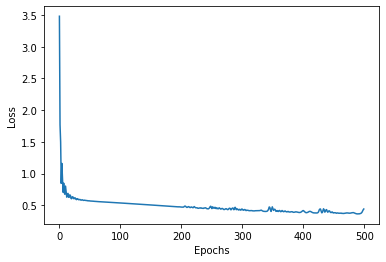

In [16]:

plt.plot(range(epochs),final)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [17]:
# Prediction in x_test data
predictions = []
with torch.no_grad():
  for i,data in enumerate(x_test):
    predictions.append(model(data).argmax().item())
    # print(model(data).argmax().item())

In [18]:
predictions

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [19]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,predictions)
cn

array([[95,  5],
       [34, 20]])

Text(69.0, 0.5, 'Predicted Value')

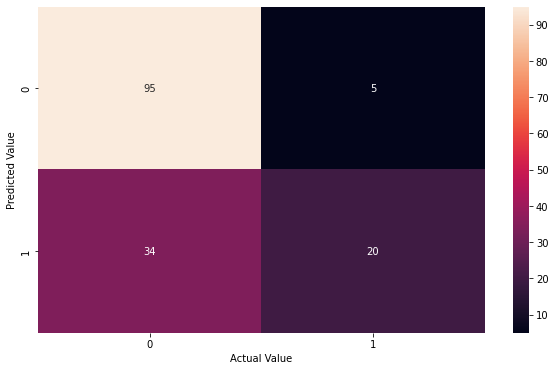

In [20]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.heatmap(cn,annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.7467532467532467

**Save and Load Model**

In [23]:
#  Save the Model
torch.save(model,'diabetes_model.pth')

In [24]:
# Load the model

Loaded_model = torch.load('diabetes_model.pth')

In [25]:
Loaded_model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [27]:
# Prediction of new-data point

list(df.iloc[0,:-1])

[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]

In [28]:
# new-data
lst1 = [6.0, 148.0, 72.0, 35.0, 0.0, 26.6, 0.627, 50.0]

In [30]:
new_data = torch.tensor(lst1)

In [34]:
with torch.no_grad():
  print(model(new_data).argmax().item())

0
